In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
import datetime
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


from ploting import *
import data

%matplotlib inline
plt.rc('text', usetex=True)
# %matplotlib notebook

pd.options.display.max_columns = 999
pd.options.display.max_rows = 100


from datetime import datetime
str(datetime.now())


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


'2019-12-22 17:38:55.539079'

In [281]:
import numpy as np
import matplotlib as mpl
# mpl.use('pgf')

def figsize(scale):
    fig_width_pt = 469.755                          # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "font.size": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": figsize(0.9),     # default fig size of 0.9 textwidth 
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    }
mpl.rcParams.update(pgf_with_latex)

import matplotlib.pyplot as plt

# I make my own newfig and savefig functions
def newfig(width):
    plt.clf()
    fig = plt.figure(figsize=figsize(width))
    ax = fig.add_subplot(111)
    return fig, ax

def newfig_sub(nrows, ncols,width, is_share=True):
    plt.clf()
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize(width), sharey=False, sharex=is_share)
    return fig, axes

def savefig(filename):
    plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/latex version/img/{}.pgf'.format(filename))
    plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/latex version/img/{}.pdf'.format(filename))
#     plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/tables and figures/img/{}.pgf'.format(filename))
#     plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/tables and figures/img/{}.pdf'.format(filename))

In [3]:
df = data.read_data('Vansjo/VAN1_data_2017_02_28_10_55.xlsx')
plotter = ResultsPlotter(f='/Users/imarkelo/git/MyLake_v2_Vansjo/IO/final_fit_192.mat')
# plotter = ResultsPlotter(f='/Users/imarkelo/git/MyLake_v2_Vansjo/IO/chl_in_tp.mat')

/Users/imarkelo/git/MyLake_v2_Vansjo/Postproc_code/data.py:10: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df = df.convert_objects(convert_numeric=True)


In [4]:
save_fig = False

### Calibration period

In [7]:
# df[(df['Temperatur'].notnull() & (df.Depth1==30))][['SampleDate','Temperatur']].to_csv('T.csv')

<Figure size 421.2x260.316 with 0 Axes>

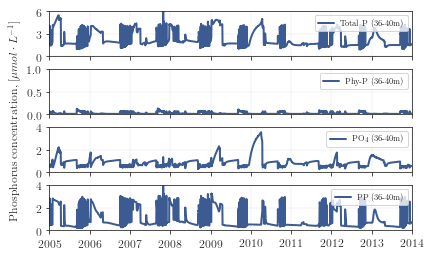

In [9]:
# %matplotlib inline
x = 'SampleDate'
env = 'water'
fig, axes = newfig_sub(4,1,1)
results = plotter.env_getter(env)
# for d,c in zip([5,], sns.color_palette()):

inx = np.where(results['z'][0, 0] == 4)[0][0]
TOTP = np.mean(results['concentrations'][0, 0]['P'][0, 0][-inx:, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['PP'][0, 0][-inx:, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['DOP'][0, 0][-inx:, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['POP'][0, 0][-inx:, :], axis=0)
Chl = np.mean(results['concentrations'][0, 0]['C'][0, 0][-inx:, :], axis=0) + np.mean(results['concentrations'][0, 0]['Chl']
                                                                                      [0, 0][-inx:, :], axis=0)
PO4 = np.mean(results['concentrations'][0, 0]['P'][0, 0][-inx:, :], axis=0)

Part = np.mean(results['concentrations'][0, 0]['POP'][0, 0][-inx:, :], axis=0) #+ np.mean(results['concentrations'][0, 0]['PP'][0, 0][-inx:, :], axis=0)




axes[0].plot(-366 + results['days'][0, 0][0], TOTP/31, c=sns.xkcd_rgb["denim blue"], lw=2, label='Total P (36-40m)')
axes[1].plot(-366 + results['days'][0, 0][0], Chl/31, c=sns.xkcd_rgb["denim blue"], lw=2, label='Phy-P (36-40m)')
axes[2].plot(-366 + results['days'][0, 0][0], PO4/31, c=sns.xkcd_rgb["denim blue"], lw=2, label=r'PO\textsubscript{4} (36-40m)')
axes[3].plot(-366 + results['days'][0, 0][0], Part/31, c=sns.xkcd_rgb["denim blue"], lw=2, label='PP (36-40m)')




# variable = 'TOTP'
# axes[0].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values/31, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

# variable = 'KlfA'
# axes[1].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values/31, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

# variable = 'PO4-P'
# axes[2].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values/31, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

# variable = 'POP'
# axes[4].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values/31, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)


for ax in axes:
    ax.grid(linestyle='-', linewidth=0.2)
#     ax.set_ylim([0, 40])
    ax.set_xlim([732313 - 366, 735234 ])
#     ax.set_xlim([732313 - 366,  732313 + 366])
#     ax.plot((732313+366*4-1, 732313+366*4-1), (0, 100), 'k--', lw=0.3)
#     ax.set_ylabel(r'$[mg / m^3]$')
    ax.legend(loc=1, frameon=1)
    ax.set_xticks([], [])
#     ax.set_yticks([0,25,50,75])
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter(' '))    


    
axes[3].xaxis.set_major_locator(mdates.MonthLocator(interval=12))
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   

axes[0].set_ylim([0, 6.01])
axes[0].set_yticks([0,3,6], [])
axes[1].set_ylim([0, 1])
# # axes[1].set_yticks([0,15,30], [])
axes[2].set_ylim([0, 4])
# # axes[2].set_yticks([0,15,30], [])
axes[3].set_ylim([0, 4])
axes[3].set_yticks([0,2,4], [])
# # axes[0].set_ylim([0, 35])



for d, ax in zip(['Total P', 'Phy-P', r'PO\textsubscript{4}', 'PP'], axes):
#     ax.text(0.015, 0.76, d, va='center', transform=ax.transAxes, bbox=dict(boxstyle="round", ec="0.3", facecolor='white', alpha=0.7))
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize('large')


for tick in axes[3].xaxis.get_major_ticks():
    tick.label.set_fontsize('large') 


fig.text(0.035, 0.5, r'Phosphorus concentration, $[\mu mol \cdot L^{-1}]$', va='center', rotation='vertical', fontsize='large')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)


# if save_fig:
# # if True:
# savefig('calibration/Phosphorus_2_192_mol_bottom')

# plt.savefig('fig4.png', dpi=1600)    
plt.show()  


<Figure size 421.2x260.316 with 0 Axes>

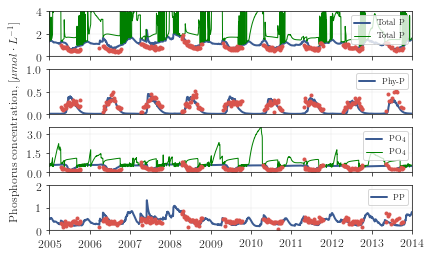

In [58]:
# %matplotlib inline
x = 'SampleDate'
env = 'water'
fig, axes = newfig_sub(4,1,1)
results = plotter.env_getter(env)
# for d,c in zip([5,], sns.color_palette()):

inx = np.where(results['z'][0, 0] == 4)[0][0]

Chl = np.mean(results['concentrations'][0, 0]['C'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['Chl']
                                                                                      [0, 0][0:inx, :], axis=0)

TOTP = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['DOP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0)


TOTP_bot = np.mean(results['concentrations'][0, 0]['P'][0, 0][-inx:, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['PP'][0, 0][-inx:, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['DOP'][0, 0][-inx:, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['POP'][0, 0][-inx:, :], axis=0)
    
PO4 = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0)
PO4_bot = np.mean(results['concentrations'][0, 0]['P'][0, 0][-inx:, :], axis=0)

Part = np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0)


axes[0].plot(-366 + results['days'][0, 0][0], TOTP/31, c=sns.xkcd_rgb["denim blue"], lw=2, label='Total P')
axes[0].plot(-366 + results['days'][0, 0][0], TOTP_bot/31, c=sns.light_palette("green")[5], lw=1, label=r'Total P')
axes[1].plot(-366 + results['days'][0, 0][0], Chl/31, c=sns.xkcd_rgb["denim blue"], lw=2, label='Phy-P')
axes[2].plot(-366 + results['days'][0, 0][0], PO4/31, c=sns.xkcd_rgb["denim blue"], lw=2, label=r'PO\textsubscript{4}')
axes[2].plot(-366 + results['days'][0, 0][0], PO4_bot/31, c=sns.light_palette("green")[5], lw=1, label=r'PO\textsubscript{4}')
axes[3].plot(-366 + results['days'][0, 0][0], Part/31, c=sns.xkcd_rgb["denim blue"], lw=2, label='PP')




variable = 'TOTP'
axes[0].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values/31, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

variable = 'KlfA'
axes[1].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values/31, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

variable = 'PO4-P'
axes[2].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values/31, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

variable = 'POP'
axes[3].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values/31, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)


for ax in axes:
    ax.grid(linestyle='-', linewidth=0.2)
#     ax.set_ylim([0, 40])
    ax.set_xlim([732313 - 366, 735234 ])
#     ax.set_xlim([732313 - 366,  732313 + 366])
#     ax.plot((732313+366*4-1, 732313+366*4-1), (0, 100), 'k--', lw=0.3)
#     ax.set_ylabel(r'$[mg / m^3]$')
    ax.legend(loc=1, frameon=1)
    ax.set_xticks([], [])
#     ax.set_yticks([0,25,50,75])
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter(' '))    


    
axes[3].xaxis.set_major_locator(mdates.MonthLocator(interval=12))
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   

axes[0].set_ylim([0, 4])
axes[0].set_yticks([0,2,4], [])
axes[1].set_ylim([0, 1])
# axes[1].set_yticks([0,15,30], [])
axes[2].set_ylim([0, 3.5])
axes[2].set_yticks([0,1.5,3.0], [])
axes[3].set_ylim([0, 2])
# axes[3].set_yticks([0,30,60], [])
# axes[0].set_ylim([0, 35])



for d, ax in zip(['Total P', 'Phy-P', r'PO\textsubscript{4}', 'PP'], axes):
#     ax.text(0.015, 0.76, d, va='center', transform=ax.transAxes, bbox=dict(boxstyle="round", ec="0.3", facecolor='white', alpha=0.7))
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize('large')


for tick in axes[3].xaxis.get_major_ticks():
    tick.label.set_fontsize('large') 


fig.text(0.035, 0.5, r'Phosphorus concentration, $[\mu mol \cdot L^{-1}]$', va='center', rotation='vertical', fontsize='large')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)


# if save_fig:
# if True:
#     savefig('calibration/Phosphorus_2_192_mol')

# plt.savefig('fig4.png', dpi=1600)    
plt.show()  


<Figure size 421.2x260.316 with 0 Axes>

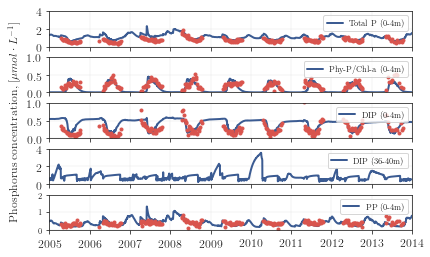

In [10]:
# %matplotlib inline
x = 'SampleDate'
env = 'water'
fig, axes = newfig_sub(5,1,1)
results = plotter.env_getter(env)
# for d,c in zip([5,], sns.color_palette()):

inx = np.where(results['z'][0, 0] == 4)[0][0]
TOTP = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['DOP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0)
Chl = np.mean(results['concentrations'][0, 0]['C'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['Chl']
                                                                                      [0, 0][0:inx, :], axis=0)
PO4 = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0)
PO4_bot = np.mean(results['concentrations'][0, 0]['P'][0, 0][-inx:, :], axis=0)
Part = np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0)


axes[0].plot(-366 + results['days'][0, 0][0], TOTP/31, c=sns.xkcd_rgb["denim blue"], lw=2, label='Total P (0-4m)')
axes[1].plot(-366 + results['days'][0, 0][0], Chl/31, c=sns.xkcd_rgb["denim blue"], lw=2, label='Phy-P/Chl-a (0-4m)')
axes[2].plot(-366 + results['days'][0, 0][0], PO4/31, c=sns.xkcd_rgb["denim blue"], lw=2, label=r'DIP (0-4m)')
axes[3].plot(-366 + results['days'][0, 0][0], PO4_bot/31, c=sns.xkcd_rgb["denim blue"], lw=2, label=r'DIP (36-40m)')
axes[4].plot(-366 + results['days'][0, 0][0], Part/31, c=sns.xkcd_rgb["denim blue"], lw=2, label='PP (0-4m)')




variable = 'TOTP'
axes[0].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values/31, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

variable = 'KlfA'
axes[1].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values/31, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

variable = 'PO4-P'
axes[2].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values/31, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

variable = 'POP'
axes[4].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values/31, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)


for ax in axes:
    ax.grid(linestyle='-', linewidth=0.2)
#     ax.set_ylim([0, 40])
    ax.set_xlim([732313 - 366, 735234 ])
#     ax.set_xlim([732313 - 366,  732313 + 366])
#     ax.plot((732313+366*4-1, 732313+366*4-1), (0, 100), 'k--', lw=0.3)
#     ax.set_ylabel(r'$[mg / m^3]$')
    ax.legend(loc=1, frameon=1)
    ax.set_xticks([], [])
#     ax.set_yticks([0,25,50,75])
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter(' '))    


    
axes[3].xaxis.set_major_locator(mdates.MonthLocator(interval=12))
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   

axes[0].set_ylim([0, 4])
axes[0].set_yticks([0,2,4], [])
axes[1].set_ylim([0, 1])
# axes[1].set_yticks([0,15,30], [])
axes[2].set_ylim([0, 1])
# axes[2].set_yticks([0,15,30], [])
axes[3].set_ylim([0, 4])
axes[3].set_yticks([0,2,4], [])
axes[4].set_ylim([0, 2])
# axes[3].set_yticks([0,30,60], [])
# axes[0].set_ylim([0, 35])



for d, ax in zip(['Total P', 'Phy-P', r'PO\textsubscript{4}', 'PP'], axes):
#     ax.text(0.015, 0.76, d, va='center', transform=ax.transAxes, bbox=dict(boxstyle="round", ec="0.3", facecolor='white', alpha=0.7))
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize('large')


for tick in axes[4].xaxis.get_major_ticks():
    tick.label.set_fontsize('large') 


fig.text(0.035, 0.5, r'Phosphorus concentration, $[\mu mol \cdot L^{-1}]$', va='center', rotation='vertical', fontsize='large')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)


# if save_fig:
# if True:
#     savefig('calibration/Phosphorus_2_192_mol')

# plt.savefig('fig4.png', dpi=1600)    
plt.show()  


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont

<Figure size 421.2x260.316 with 0 Axes>

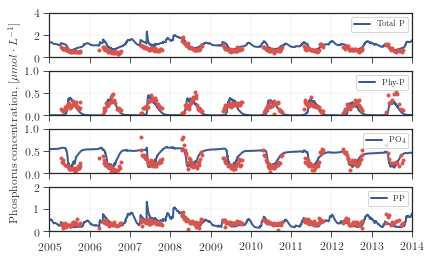

In [9]:
# %matplotlib inline
x = 'SampleDate'
env = 'water'
fig, axes = newfig_sub(4,1,1)
results = plotter.env_getter(env)
# for d,c in zip([5,], sns.color_palette()):

inx = np.where(results['z'][0, 0] == 4)[0][0]
TOTP = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['DOP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0)
Chl = np.mean(results['concentrations'][0, 0]['C'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['Chl']
                                                                                      [0, 0][0:inx, :], axis=0)
PO4 = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0)
Part = np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0)


axes[0].plot(-366 + results['days'][0, 0][0], TOTP/31, c=sns.xkcd_rgb["denim blue"], lw=2, label='Total P')
axes[1].plot(-366 + results['days'][0, 0][0], Chl/31, c=sns.xkcd_rgb["denim blue"], lw=2, label='Phy-P')
axes[2].plot(-366 + results['days'][0, 0][0], PO4/31, c=sns.xkcd_rgb["denim blue"], lw=2, label=r'PO\textsubscript{4}')
axes[3].plot(-366 + results['days'][0, 0][0], Part/31, c=sns.xkcd_rgb["denim blue"], lw=2, label='PP')




variable = 'TOTP'
axes[0].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values/31, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

variable = 'KlfA'
axes[1].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values/31, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

variable = 'PO4-P'
axes[2].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values/31, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

variable = 'POP'
axes[3].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values/31, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)


for ax in axes:
    ax.grid(linestyle='-', linewidth=0.2)
#     ax.set_ylim([0, 40])
    ax.set_xlim([732313 - 366, 735234 ])
#     ax.set_xlim([732313 - 366,  732313 + 366])
#     ax.plot((732313+366*4-1, 732313+366*4-1), (0, 100), 'k--', lw=0.3)
#     ax.set_ylabel(r'$[mg / m^3]$')
    ax.legend(loc=1, frameon=1)
    ax.set_xticks([], [])
#     ax.set_yticks([0,25,50,75])
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter(' '))    


    
axes[3].xaxis.set_major_locator(mdates.MonthLocator(interval=12))
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   

axes[0].set_ylim([0, 4])
axes[0].set_yticks([0,2,4], [])
axes[1].set_ylim([0, 1])
# axes[1].set_yticks([0,15,30], [])
axes[2].set_ylim([0, 1])
# axes[2].set_yticks([0,15,30], [])
axes[3].set_ylim([0, 2])
# axes[3].set_yticks([0,30,60], [])
# axes[0].set_ylim([0, 35])



for d, ax in zip(['Total P', 'Phy-P', r'PO\textsubscript{4}', 'PP'], axes):
#     ax.text(0.015, 0.76, d, va='center', transform=ax.transAxes, bbox=dict(boxstyle="round", ec="0.3", facecolor='white', alpha=0.7))
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize('large')


for tick in axes[3].xaxis.get_major_ticks():
    tick.label.set_fontsize('large') 


fig.text(0.035, 0.5, r'Phosphorus concentration, $[\mu mol \cdot L^{-1}]$', va='center', rotation='vertical', fontsize='large')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)


# if save_fig:
# if True:
#     savefig('calibration/Phosphorus_2_192_mol')

# plt.savefig('fig4.png', dpi=1600)    
plt.show()  


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


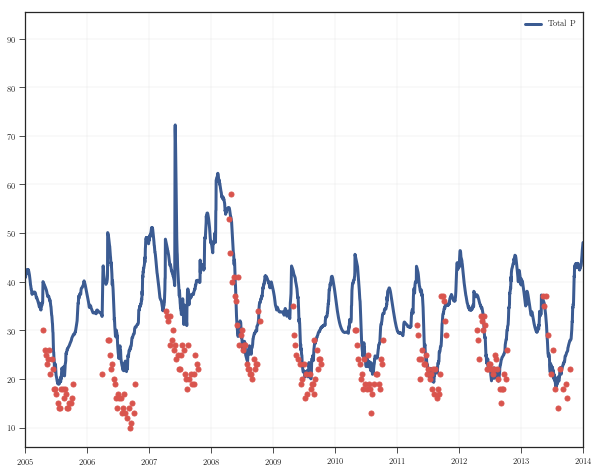

In [7]:
plt.figure(figsize=(10,8))
TOTP = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['DOP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0)
plt.plot(-366 + results['days'][0, 0][0], TOTP, c=sns.xkcd_rgb["denim blue"], lw=3, label='Total P')

variable = 'TOTP'
plt.plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=5)

plt.legend()
ax = plt.gca()
ax.set_xlim([732313 - 366, 735234 ])
ax.grid(linestyle='-', linewidth=0.2)

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


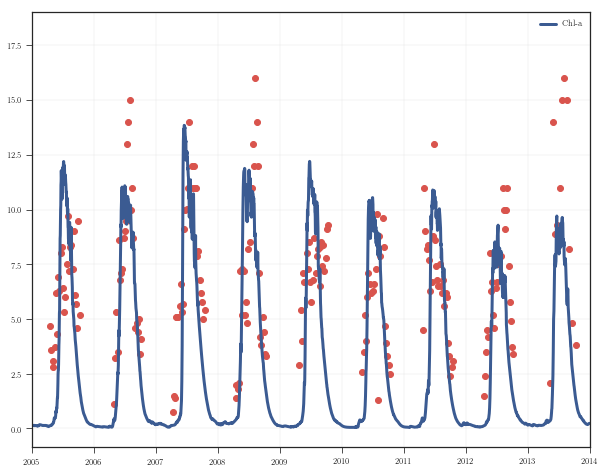

In [8]:
plt.figure(figsize=(10,8))
Chl = np.mean(results['concentrations'][0, 0]['C'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['Chl']
                                                                                      [0, 0][0:inx, :], axis=0)
plt.plot(-366 + results['days'][0, 0][0], Chl, c=sns.xkcd_rgb["denim blue"], lw=3, label='Chl-a')

variable = 'KlfA'
plt.scatter(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values, c=sns.xkcd_rgb["pale red"], label=None)
plt.legend()
ax = plt.gca()
ax.set_xlim([732313 - 366, 735234 ])
ax.grid(linestyle='-', linewidth=0.2)

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


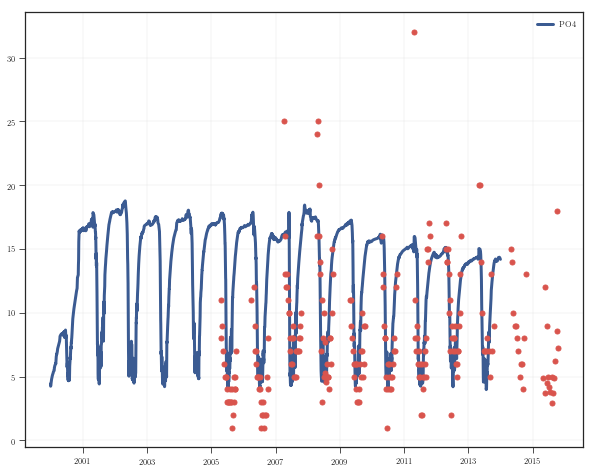

In [9]:
plt.figure(figsize=(10,8))
PO4 = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0)
plt.plot(-366 + results['days'][0, 0][0], PO4, c=sns.xkcd_rgb["denim blue"], lw=3, label='PO4')

variable = 'PO4-P'
plt.plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=5)

plt.legend()
ax = plt.gca()
# ax.set_xlim([732313 - 366, 735234 ])
ax.grid(linestyle='-', linewidth=0.2)

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


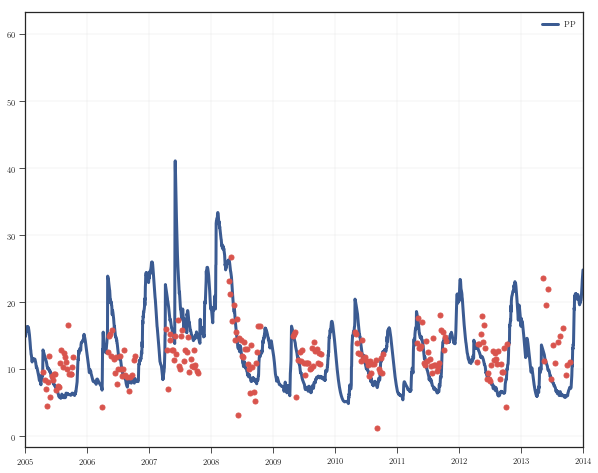

In [10]:
plt.figure(figsize=(10,8))
Part = np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0)
plt.plot(-366 + results['days'][0, 0][0], Part, c=sns.xkcd_rgb["denim blue"], lw=3, label='PP')

variable = 'POP'
plt.plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=5)

plt.legend()
ax = plt.gca()
ax.set_xlim([732313 - 366, 735234 ])
ax.grid(linestyle='-', linewidth=0.2)

<Figure size 421.2x260.316 with 0 Axes>

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


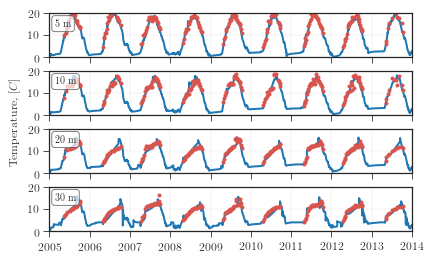

In [11]:
x = 'SampleDate'
env = 'water'
fig, axes = newfig_sub(4,1,1)
results = plotter.env_getter(env)
# for d,c in zip([5,], sns.color_palette()):
for d, a in zip([5,10, 20, 30], axes):
    env = 'water'
    inx = np.where(results['z'][0, 0] == d)[0][0]
    y = results['T'][0, 0][inx, :]
    a.plot(-366 + results['days'][0, 0][0], y, lw=2, label=str(d) + ' m', color=None)
    a.plot_date(df[(np.isfinite(df['Temperatur'])) & (df['Depth1'] == d)][x].values, df[(np.isfinite(df['Temperatur'])) & (df.Depth1 == d)]['Temperatur'].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

for ax in axes:
    ax.grid(linestyle='-', linewidth=0.2)
    ax.set_ylim([0, 20])
    ax.set_xlim([732313 - 366, 735234 ])
#     ax.legend(loc=2, frameon=1)
    ax.set_xticks([], [])
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter(' '))    

axes[3].xaxis.set_major_locator(mdates.MonthLocator(interval=12))
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   



for d, ax in zip([5,10, 20, 30], axes):
    ax.text(0.015, 0.76, str(d)+' m', va='center', transform=ax.transAxes, bbox=dict(boxstyle="round", ec="0.3", facecolor='white', alpha=0.7))
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize('large')


for tick in axes[3].xaxis.get_major_ticks():
    tick.label.set_fontsize('large') 


fig.text(0.035, 0.5, r'Temperature, $[C]$', va='center', rotation='vertical', fontsize='large')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

if save_fig:
# if True:
    savefig('calibration/Temperature_no_vert_2')
    
plt.show() 

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


<Figure size 421.2x260.316 with 0 Axes>

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


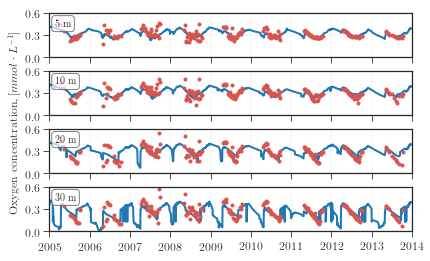

In [50]:
x = 'SampleDate'

fig, axes = newfig_sub(4,1,1)
results = plotter.env_getter(env)
# for d,c in zip([5,], sns.color_palette()):
for d, a in zip([5,10, 20, 30], axes):
    env = 'water'
    inx = np.where(results['z'][0, 0] == d)[0][0]
    y = results['concentrations'][0, 0]['O2'][0, 0][inx, :]/32000
    a.plot(-366 + results['days'][0, 0][0], y, lw=2, label=str(d) + ' m', color=None)
    a.plot_date(df[(np.isfinite(df['O2'])) & (df['Depth1'] == d)][x].values, df[(np.isfinite(df['O2'])) & (df.Depth1 == d)]['O2'].values/32, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

for ax in axes:
    ax.grid(linestyle='-', linewidth=0.2)
    ax.set_ylim([0, 0.6])
    ax.set_yticks([0,0.3, 0.6], [])
    ax.set_xlim([732313 - 366, 735234])
    ax.set_xticks([], [])
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter(' '))    

axes[3].xaxis.set_major_locator(mdates.MonthLocator(interval=12))
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   

for d, ax in zip([5,10, 20, 30], axes):
    ax.text(0.015, 0.76, str(d)+' m', va='center', transform=ax.transAxes, bbox=dict(boxstyle="round", ec="0.3", facecolor='white', alpha=0.7))
#     ax.set_yticks([0,5,10,15], [0,5,10,15])
#     ax.set_yticklabels([0,5,10,15])
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize('large')


for tick in axes[3].xaxis.get_major_ticks():
    tick.label.set_fontsize('large') 

fig.text(0.035, 0.5, r'Oxygen concentration, $[m mol\cdot L^{-1}]$', va='center', rotation='vertical', fontsize='large')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

if save_fig:
# if True:
    savefig('calibration/Oxygen_fit192_mol')

plt.show() 

Text(0.05,0.5,'Temperature, $[C]$')

<Figure size 421.2x260.316 with 0 Axes>

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


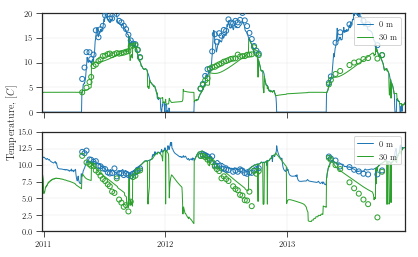

In [13]:
x = 'SampleDate'
env = 'water'
fig, axes = newfig_sub(2,1,1)
results = plotter.env_getter(env)
# for d,c in zip([5,], sns.color_palette()):

d=0
env = 'water'
inx = np.where(results['z'][0, 0] == d)[0][0]
y = results['T'][0, 0][inx, :]
axes[0].plot(-366 + results['days'][0, 0][0], y, lw=1, label=str(d) + ' m', color=sns.color_palette()[0],zorder=1)
axes[0].scatter(df[(np.isfinite(df['Temperatur'])) & (df['Depth1'] == d)][x].values, df[(np.isfinite(df['Temperatur'])) & (df.Depth1 == d)]['Temperatur'].values, label=None, s=25, zorder=3, facecolors='none', edgecolors=sns.color_palette()[0])

d=30
inx = np.where(results['z'][0, 0] == d)[0][0]
y = results['T'][0, 0][inx, :]
axes[0].plot(-366 + results['days'][0, 0][0], y, lw=1, label=str(d) + ' m', color=sns.color_palette()[2], zorder=2)
axes[0].scatter(df[(np.isfinite(df['Temperatur'])) & (df['Depth1'] == d)][x].values, df[(np.isfinite(df['Temperatur'])) & (df.Depth1 == d)]['Temperatur'].values, label=None, s=25, facecolors='none', edgecolors=sns.color_palette()[2], zorder=4)


d=0
env = 'water'
inx = np.where(results['z'][0, 0] == d)[0][0]
y = results['concentrations'][0, 0]['O2'][0, 0][inx, :]/1000
axes[1].plot(-366 + results['days'][0, 0][0], y, lw=1, label=str(d) + ' m', color=sns.color_palette()[0],zorder=1)
axes[1].scatter(df[(np.isfinite(df['O2'])) & (df['Depth1'] == d)][x].values, df[(np.isfinite(df['O2'])) & (df.Depth1 == d)]['O2'].values, label=None, s=25, zorder=3, facecolors='none', edgecolors=sns.color_palette()[0])

d=30
inx = np.where(results['z'][0, 0] == d)[0][0]
y = results['concentrations'][0, 0]['O2'][0, 0][inx, :]/1000
axes[1].plot(-366 + results['days'][0, 0][0], y, lw=1, label=str(d) + ' m', color=sns.color_palette()[2], zorder=2)
axes[1].scatter(df[(np.isfinite(df['O2'])) & (df['Depth1'] == d)][x].values, df[(np.isfinite(df['O2'])) & (df.Depth1 == d)]['O2'].values, label=None, s=25, facecolors='none', edgecolors=sns.color_palette()[2], zorder=4)




for ax in axes:
    ax.grid(linestyle='-', linewidth=0.2)
    ax.set_ylim([0, 20])
    ax.set_xlim([732313 + 364*5, 735234 -10])
    ax.plot((732313+366*4-1, 732313+366*4-1), (0, 23), 'k--', lw=0.3)
#     ax.set_ylabel(r'$[mg / m^3]$')
    ax.legend(loc=1, frameon=1)
    ax.set_xticks([], [])
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter(' '))    

axes[1].set_ylim([0, 15])    
    
axes[1].xaxis.set_major_locator(mdates.MonthLocator(interval=12))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   


fig.text(0.05, 0.5, r'Temperature, $[C]$', va='center', rotation='vertical')

# if save_fig:
# # if True:
# savefig('calibration/T_O')
    
# plt.show() 

<Figure size 421.2x260.316 with 0 Axes>

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


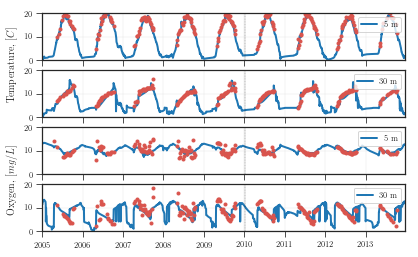

In [14]:
x = 'SampleDate'
env = 'water'
fig, axes = newfig_sub(4,1,1)
results = plotter.env_getter(env)
# for d,c in zip([5,], sns.color_palette()):
for d, a in zip([5,30,], axes[:2]):
    env = 'water'
    inx = np.where(results['z'][0, 0] == d)[0][0]
    y = results['T'][0, 0][inx, :]
    a.plot(-366 + results['days'][0, 0][0], y, lw=2, label=str(d) + ' m', color=None)
    a.plot_date(df[(np.isfinite(df['Temperatur'])) & (df['Depth1'] == d)][x].values, df[(np.isfinite(df['Temperatur'])) & (df.Depth1 == d)]['Temperatur'].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

for d, a in zip([5,30], axes[2:]):
    env = 'water'
    inx = np.where(results['z'][0, 0] == d)[0][0]
    y = results['concentrations'][0, 0]['O2'][0, 0][inx, :]/1000
    a.plot(-366 + results['days'][0, 0][0], y, lw=2, label=str(d) + ' m', color=None)
    a.plot_date(df[(np.isfinite(df['O2'])) & (df['Depth1'] == d)][x].values, df[(np.isfinite(df['O2'])) & (df.Depth1 == d)]['O2'].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)


    

for ax in axes:
    ax.grid(linestyle='-', linewidth=0.2)
    ax.set_ylim([0, 20])

    ax.set_xlim([732313 - 366, 735234 -10])
    ax.plot((732313+366*4-1, 732313+366*4-1), (0, 23), 'k--', lw=0.3)
#     ax.set_ylabel(r'$[mg / m^3]$')
    ax.legend(loc=1, frameon=1)
    ax.set_xticks([], [])
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter(' '))    


axes[3].xaxis.set_major_locator(mdates.MonthLocator(interval=12))
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   


fig.text(0.05, 0.7, r'Temperature, $[C]$', va='center', rotation='vertical')
fig.text(0.05, 0.3, r'Oxygen, $[mg/L]$', va='center', rotation='vertical')

# if save_fig:
# if True:
#     savefig('calibration/T_O_2')
    
plt.show() 

In [15]:
ice_data = pd.read_excel('Vansjo/Ice_data_Vansjø_Vanem_1994-2010.xlsx', sheetname='ice1994-2010', skiprows=0)
ice_data.Date = pd.to_datetime(ice_data.Date)
# sediment_data= sediment_data.convert_objects(convert_numeric=True)

In [16]:
import datetime
ice_data = ice_data.set_index(ice_data.Date)
ice_data.loc[ice_data['on/off'] == 'Ice-on', 'Bool'] = 1
ice_data.loc[ice_data['on/off'] == 'Ice-off', 'Bool'] = 0
ice_data['DOY'] = ice_data.index.dayofyear
ice_data.loc[(ice_data.Bool == 1) & (ice_data.DOY < 150), 'DOY'] = ice_data.DOY + 365
ice_data.loc[(ice_data.Bool == 0) & (ice_data.DOY > 150), 'DOY'] = ice_data.DOY - 365

# ice_data['Date'] = ice_data['Date'].dt.strftime('%d-%m-%Y')
# day_of_year = ice_data['Date'].tm_yday
ice_data['Date'] = pd.to_datetime(ice_data['Date'])
ice_data['date_f'] = pd.factorize(ice_data['Date'])[0] + 1
mapping = dict(zip(ice_data['date_f'], ice_data['Date'].dt.date))

[Text(0,0,'Jan'),
 Text(0,0,'Feb'),
 Text(0,0,'Mar'),
 Text(0,0,'Apr'),
 Text(0,0,'May'),
 Text(0,0,'Jun'),
 Text(0,0,'Jul'),
 Text(0,0,'Aug'),
 Text(0,0,'Sep'),
 Text(0,0,'Oct'),
 Text(0,0,'Nov'),
 Text(0,0,'Dec')]

<Figure size 421.2x260.316 with 0 Axes>

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


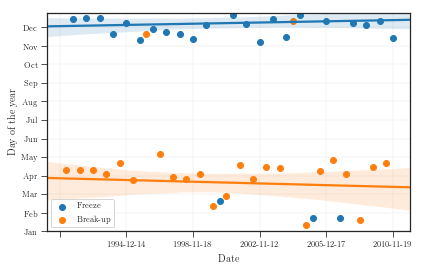

In [17]:
fig, ax = newfig(1)
ax.scatter(ice_data.date_f[ice_data.Bool==1], np.mod(ice_data.DOY[ice_data.Bool==1], 365), label='Freeze')
ax.scatter(ice_data.date_f[ice_data.Bool==0], np.mod(ice_data.DOY[ice_data.Bool==0], 365), label='Break-up')
ax.grid(linestyle='-', linewidth=0.2)
ax.legend(frameon=1)
ax = sns.regplot('date_f', 'DOY', data=ice_data[ice_data.Bool==1], scatter=0, ax=ax)
ax = sns.regplot('date_f', 'DOY', data=ice_data[ice_data.Bool==0], scatter=0, ax=ax)
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
ax.set_ylim(0, 365)
ax.set_ylabel('Day of the year')
ax.set_xlabel('Date')
ax.set_yticks(np.arange(0, 12*30.5 , 31))
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan'])
# ax.xaxis.set_major_locator(mdates.YearLocator(interval=1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   

In [18]:
# f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
# ax.scatter(ice_data.date_f[ice_data.Bool==1], ice_data.DOY[ice_data.Bool==1], label='Freeze')
# ax = sns.regplot('date_f', 'DOY', data=ice_data[ice_data.Bool==1], scatter=0, ax=ax)

# ax2.scatter(ice_data.date_f[ice_data.Bool==0], ice_data.DOY[ice_data.Bool==0], label='Break-up', c='g')
# ax2 = sns.regplot('date_f', 'DOY', data=ice_data[ice_data.Bool==0], scatter=0, ax=ax2)


# # zoom-in / limit the view to different portions of the data
# # ax.set_ylim(50, 200)  # outliers only
# # ax2.set_ylim(300, 365)  # most of the data

# # hide the spines between ax and ax2
# ax.spines['bottom'].set_visible(False)
# ax2.spines['top'].set_visible(False)

# # ax.xaxis.tick_top()
# ax.tick_params(labeltop='off')  # don't put tick labels at the top
# ax2.xaxis.tick_bottom()

# d = .015  # how big to make the diagonal lines in axes coordinates
# # arguments to pass to plot, just so we don't keep repeating them
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
# ax.set_xticklabels(labels)
# ax.set_xlabel(' ')
# ax.grid(linestyle='-', linewidth=0.2)
# ax2.grid(linestyle='-', linewidth=0.2)

# ax.set_yticks(np.arange(305, 425, 31))
# ax.set_yticklabels(['Nov', 'Dec', 'Jan', 'Feb'])
# ax2.set_yticks(np.arange(0, 5*30 , 30))
# ax2.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
# ax.set_ylim(305, 425)
# ax2.set_ylim(0, 6*30)
# ax2.set_ylabel('Break-Up')
# ax.set_ylabel('Freeze')
# ax2.set_xlabel('Date')
# ax.tick_params(which='major', length=0)
# if save_fig:
#     savefig('Freeze_break')

In [19]:
import extra_methods

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [20]:
df['date2num'] = df.SampleDate.apply(extra_methods.convert_timestamp_to_num)

In [21]:
# save_fig=True

#### Oxygen 1:1 plots

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


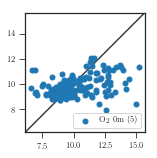

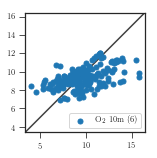

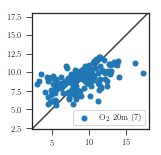

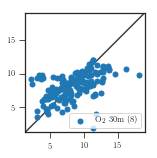

In [22]:
variable_s = 'O2'
variable_o = 'O2'
days_sim = results['days'][0, 0][0]
for i, d in enumerate([0,10,20,30]):
    inx = np.where(results['z'][0, 0] == d)[0][0]
    s = results['concentrations'][0, 0][variable_s][0, 0][inx, :]/1000
    o = np.array([df[(np.isfinite(df[variable_o])) & (df['Depth1'] == d)]['date2num'].values, df[(np.isfinite(df[variable_o])) & (df.Depth1 == d)][variable_o].values])
    s, o = extra_methods.intersaction_of_sim_with_obs(results['days'][0, 0][0], s, o[0,:], o[1, :])
#     plt.figure()
#     fig, ax = newfig(0.45)
    fig = plt.figure(figsize=(2.3,2.3))
    ax = fig.add_subplot(1, 1, 1) 
    ax.scatter(o,s, label=r'O\textsubscript{2} ' + str(d) + 'm ({})'.format(i+5), s=25)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
#     ax.set_xlabel('Observed Oxygen')
#     ax.set_ylabel('Simulated Oxygen')
    ax.legend(frameon=1, loc=4)
    plt.tight_layout()
    if save_fig:
        savefig('one_to_one/ox_{}m'.format(d))
    plt.show()
    

#### 1:1 Temperature plots

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


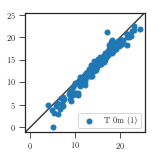

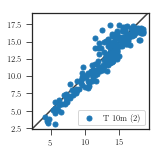

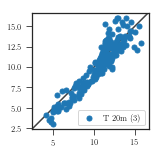

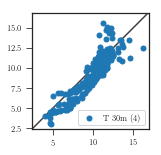

In [23]:
variable_o = 'Temperatur'
days_sim = results['days'][0, 0][0]
for i, d in enumerate([0,10,20,30]):
    inx = np.where(results['z'][0, 0] == d)[0][0]
    s = results['T'][0, 0][inx, :]
    o = np.array([df[(np.isfinite(df[variable_o])) & (df['Depth1'] == d)]['date2num'].values, df[(np.isfinite(df[variable_o])) & (df.Depth1 == d)][variable_o].values])
    s, o = extra_methods.intersaction_of_sim_with_obs(results['days'][0, 0][0], s, o[0,:], o[1, :])
#     plt.figure()
#     fig, ax = newfig(0.45)
    fig = plt.figure(figsize=(2.3,2.3))
    ax = fig.add_subplot(1, 1, 1) 
    ax.scatter(o,s, label='T ' + str(d) + 'm ({})'.format(i+1), s=25)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
#     ax.set_xlabel('Observed Oxygen')
#     ax.set_ylabel('Simulated Oxygen')
    ax.legend(frameon=1, loc=4)
    plt.tight_layout()
    if save_fig:
        savefig('one_to_one/T_{}m'.format(d))
    plt.show()
    

#### 1:1 TOTP

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


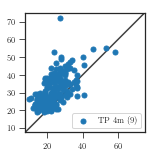

In [24]:
variable = 'TOTP'
results = plotter.env_getter(env)
inx = np.where(results['z'][0, 0] == 4)[0][0]
s = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['DOP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0)
o = np.array([df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)]['date2num'].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values])
s, o = extra_methods.intersaction_of_sim_with_obs(results['days'][0, 0][0], s, o[0,:], o[1, :])

fig = plt.figure(figsize=(2.3,2.3))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(o,s, label='TP 4m (9)', s=25)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
#     ax.set_xlabel('Observed Oxygen')
#     ax.set_ylabel('Simulated Oxygen')
ax.legend(frameon=1, loc=4)
plt.tight_layout()
if save_fig:
    savefig('one_to_one/TOTP_4m')
plt.show()

#### 1:1 Chl

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


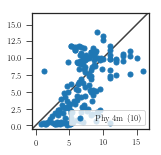

In [25]:
results = plotter.env_getter(env)
s = np.mean(results['concentrations'][0, 0]['C'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['Chl'][0, 0][0:inx, :], axis=0)
o = np.loadtxt('../obs/store_obs/Cha.dat', delimiter=',')
s, o = extra_methods.intersaction_of_sim_with_obs(results['days'][0, 0][0], s, o[:,0], o[:, 1])

fig = plt.figure(figsize=(2.3,2.3))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(o,s, label='Phy 4m (10)', s=25)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
#     ax.set_xlabel('Observed Oxygen')
#     ax.set_ylabel('Simulated Oxygen')
ax.legend(frameon=1, loc=4)
plt.tight_layout()
if save_fig:
    savefig('one_to_one/Chl_4m')
plt.show()

#### 1:1 PO4

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


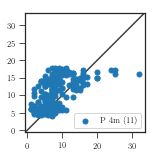

In [26]:
variable = 'PO4-P'
s = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0)
o = np.array([df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)]['date2num'].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values])
s, o = extra_methods.intersaction_of_sim_with_obs(results['days'][0, 0][0], s, o[0,:], o[1, :])

fig = plt.figure(figsize=(2.3,2.3))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(o,s, label='P 4m (11)', s=25)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
#     ax.set_xlabel('Observed Oxygen')
#     ax.set_ylabel('Simulated Oxygen')
ax.legend(frameon=1, loc=4)
plt.tight_layout()
if save_fig:
    savefig('one_to_one/PO4_4m')
plt.show()

#### 1:1 PP

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


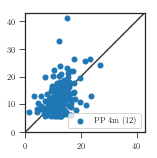

In [27]:
variable = 'POP'
s = np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0)
o = np.array([df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)]['date2num'].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values])
s, o = extra_methods.intersaction_of_sim_with_obs(results['days'][0, 0][0], s, o[0,:], o[1, :])

fig = plt.figure(figsize=(2.3,2.3))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(o,s, label='PP 4m (12)', s=25)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
#     ax.set_xlabel('Observed Oxygen')
#     ax.set_ylabel('Simulated Oxygen')
ax.legend(frameon=1, loc=4)
plt.tight_layout()
if save_fig:
    savefig('one_to_one/PP_4m')
plt.show()

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 421.2x260.316 with 0 Axes>

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


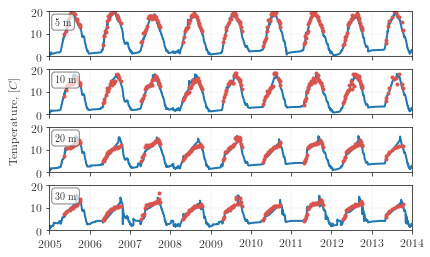

In [5]:
x = 'SampleDate'
env = 'water'
fig, axes = newfig_sub(4,1,1)
results = plotter.env_getter(env)
# for d,c in zip([5,], sns.color_palette()):
for d, a in zip([5,10, 20, 30], axes):
    env = 'water'
    inx = np.where(results['z'][0, 0] == d)[0][0]
    y = results['T'][0, 0][inx, :]
    a.plot(-366 + results['days'][0, 0][0], y, lw=2, label=str(d) + ' m', color=None)
    a.plot_date(df[(np.isfinite(df['Temperatur'])) & (df['Depth1'] == d)][x].values, df[(np.isfinite(df['Temperatur'])) & (df.Depth1 == d)]['Temperatur'].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

for ax in axes:
    ax.grid(linestyle='-', linewidth=0.2)
    ax.set_ylim([0, 20])
    ax.set_xlim([732313 - 366, 735234 ])
#     ax.legend(loc=2, frameon=1)
    ax.set_xticks([], [])
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter(' '))    

axes[3].xaxis.set_major_locator(mdates.MonthLocator(interval=12))
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   



for d, ax in zip([5,10, 20, 30], axes):
    ax.text(0.015, 0.76, str(d)+' m', va='center', transform=ax.transAxes, bbox=dict(boxstyle="round", ec="0.3", facecolor='white', alpha=0.7))
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize('large')


for tick in axes[3].xaxis.get_major_ticks():
    tick.label.set_fontsize('large') 


fig.text(0.035, 0.5, r'Temperature, $[C]$', va='center', rotation='vertical', fontsize='large')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

if save_fig:
# if True:
    savefig('calibration/Temperature_no_vert_2')
    
plt.show() 

In [12]:
df[(np.isfinite(df['Temperatur']))]

,ProjectId,ProjectName,StationId,StationCode,StationName,SampleDate,Depth1,Depth2,Alk_4.5,Blågrønnalger,Ca,Dinoflagellater,Euglenoider,Farge,Fytoplankton totalt biovolum,Grønnalger,Gulgrønnalger,Gullalger,Kiselalger,KlfA,Kryptomonader,Microcystin,Myalger,NH4-N,NO3-N,O2,O2 (metning),pH,Phycocyanin,PO4-P,PON,POP,Raphidop,SGR - Suspendert gløderest,Siktdyp,SiO2,STS,Temperatur,TOC,TOTN,TOTP,TOTP_P,Uspes_fytoplankton
5,321,Vansjø,9458,VAN1,Storefjorden,2005-04-25,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.10,NaN,NaN,7.200,NaN,NaN,NaN,NaN,NaN
7,321,Vansjø,9458,VAN1,Storefjorden,2005-04-25,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.500,NaN,NaN,NaN,NaN,NaN
8,321,Vansjø,9458,VAN1,Storefjorden,2005-04-25,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.300,NaN,NaN,NaN,NaN,NaN
9,321,Vansjø,9458,VAN1,Storefjorden,2005-04-25,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.800,NaN,NaN,NaN,NaN,NaN
10,321,Vansjø,9458,VAN1,Storefjorden,2005-04-25,12,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.400,NaN,NaN,NaN,NaN,NaN
11,321,Vansjø,9458,VAN1,Storefjorden,2005-04-25,15,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.200,NaN,NaN,NaN,NaN,NaN
12,321,Vansjø,9458,VAN1,Storefjorden,2005-04-25,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.200,NaN,NaN,NaN,NaN,NaN
13,321,Vansjø,9458,VAN1,Storefjorden,2005-05-02,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.20,NaN,NaN,8.800,NaN,NaN,NaN,NaN,NaN
14,321,Vansjø,9458,VAN1,Storefjorden,2005-05-02,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.800,NaN,NaN,NaN,NaN,NaN
15,321,Vansjø,9458,VAN1,Storefjorden,2005-05-02,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.800,NaN,NaN,NaN,NaN,NaN


In [214]:
dfT = df[(np.isfinite(df['Temperatur']))][['SampleDate','Depth1','Depth2','Temperatur']]

In [233]:
dfT2014 = dfT[(dfT['SampleDate']>datetime.datetime(2010,1,1)) & (dfT['SampleDate']<datetime.datetime(2011,1,1))]

In [234]:
dfT2014.SampleDate.unique()

array(['2010-04-26T00:00:00.000000000', '2010-05-03T00:00:00.000000000',
       '2010-05-10T00:00:00.000000000', '2010-05-18T00:00:00.000000000',
       '2010-05-25T00:00:00.000000000', '2010-05-31T00:00:00.000000000',
       '2010-06-07T00:00:00.000000000', '2010-06-14T00:00:00.000000000',
       '2010-06-21T00:00:00.000000000', '2010-06-28T00:00:00.000000000',
       '2010-07-05T00:00:00.000000000', '2010-07-12T00:00:00.000000000',
       '2010-07-19T00:00:00.000000000', '2010-07-26T00:00:00.000000000',
       '2010-08-03T00:00:00.000000000', '2010-08-09T00:00:00.000000000',
       '2010-08-16T00:00:00.000000000', '2010-09-06T00:00:00.000000000',
       '2010-09-14T00:00:00.000000000', '2010-09-20T00:00:00.000000000',
       '2010-09-27T00:00:00.000000000'], dtype='datetime64[ns]')

In [235]:
times = dfT2014.SampleDate.unique()

In [236]:
len(times)

21

In [237]:
times_2 = list(times[:24:2])+ list(times[1:25:2])

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


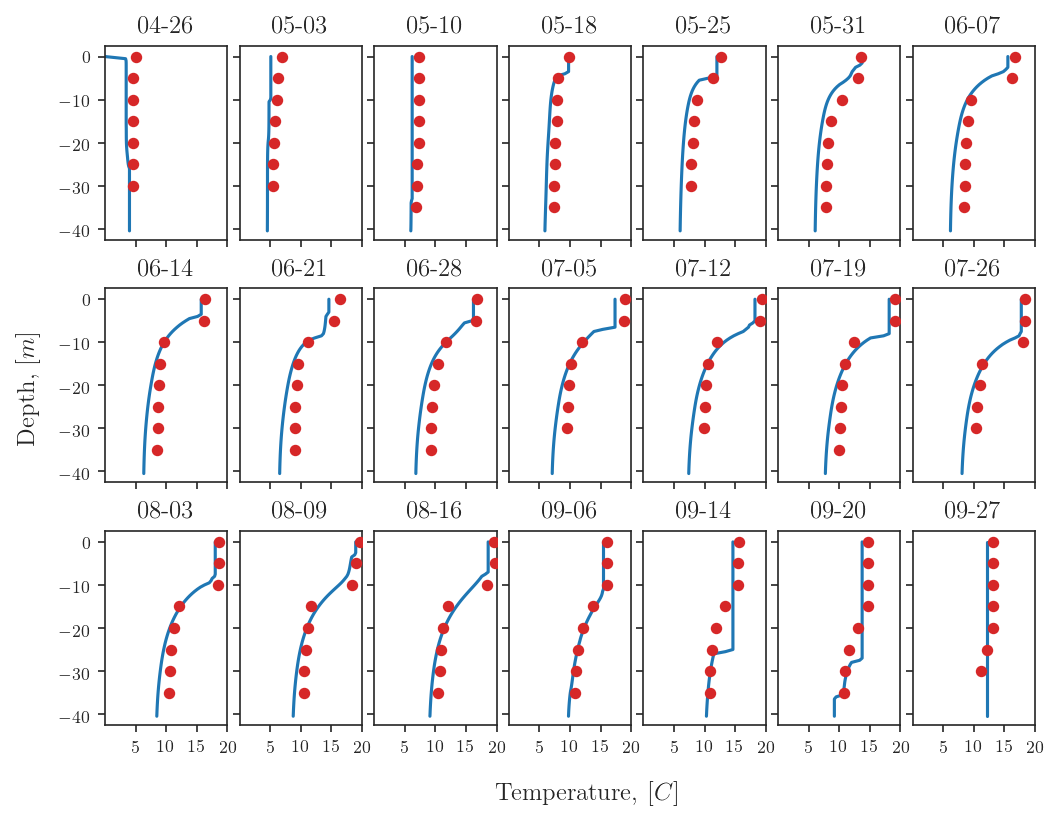

In [287]:
fig, axes  = plt.subplots(3,7, figsize=(8,6),sharex='all', sharey='all', dpi=150)
axes = [item for sublist in axes for item in sublist]
for a,t in zip(axes, times):

    a.set_title(str(t)[5:10])
    idx = (datetime.datetime.strptime(str(t)[:10], '%Y-%m-%d') - datetime.datetime(2000,1,1)).days
    a.plot(results['T'][0,0][:,idx], -results['z'][0,0])
    a.set_xlim(0,20)
    a.set_xticks([ 5,10, 15, 20])
    a.scatter(dfT2014[dfT2014.SampleDate == t]['Temperatur'], -dfT2014[dfT2014.SampleDate == t]['Depth1'], s=20, c=sns.color_palette()[3], zorder=10)

fig.text(0.05, 0.5, r'Depth, $[m]$', va='center', rotation='vertical', fontsize='large')
fig.text(0.45, 0.05, r'Temperature, $[C]$', va='center', rotation='horizontal', fontsize='large')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.25)
# title('Measured vs. simulated depth profiles')
plt.savefig('temperature_vert_profiles.pdf')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


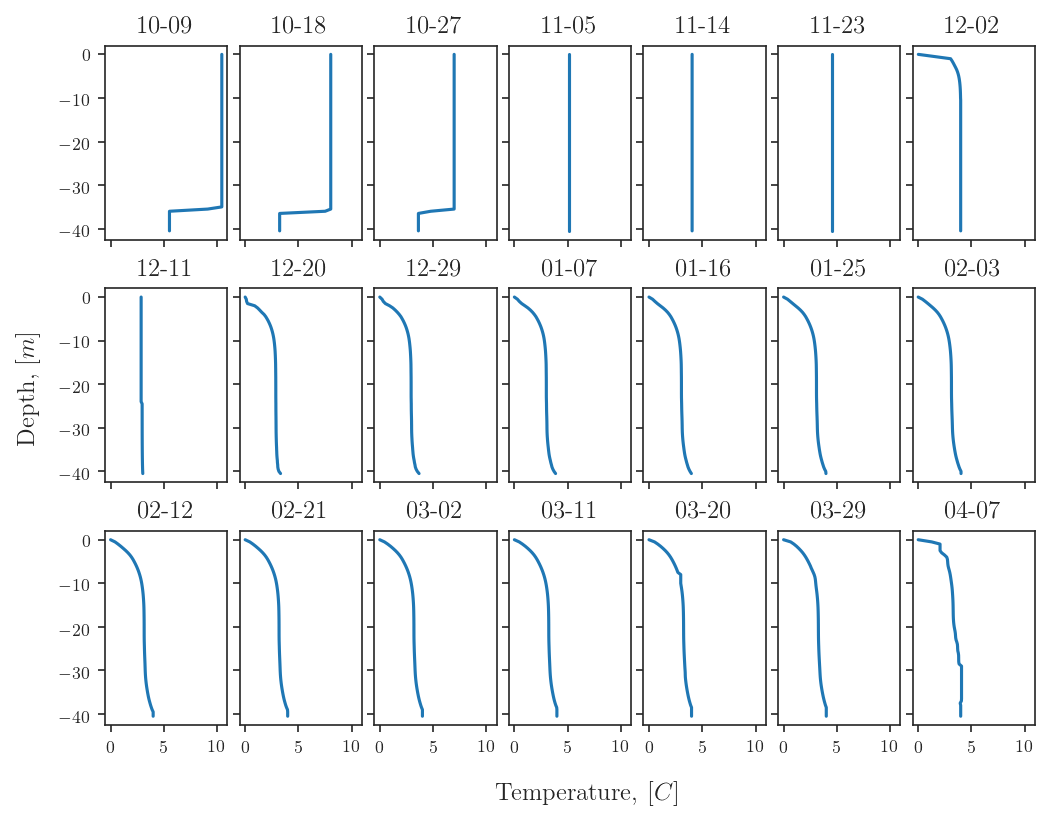

In [303]:
fig, axes  = plt.subplots(3,7, figsize=(8,6),sharex='all', sharey='all', dpi=150)
axes = [item for sublist in axes for item in sublist]
t = datetime.datetime(2009,9,30)
for a in axes:
    t+= datetime.timedelta(days=9)
    a.set_title(str(t)[5:10])
    idx = (datetime.datetime.strptime(str(t)[:10], '%Y-%m-%d') - datetime.datetime(2000,1,1)).days
    a.plot(results['T'][0,0][:,idx], -results['z'][0,0])
#     a.set_xlim(0,15)
    a.set_xticks([0, 5,10,])

fig.text(0.05, 0.5, r'Depth, $[m]$', va='center', rotation='vertical', fontsize='large')
fig.text(0.45, 0.05, r'Temperature, $[C]$', va='center', rotation='horizontal', fontsize='large')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.25)
# title('Measured vs. simulated depth profiles')
plt.savefig('temperature_winter_profiles.pdf')

In [239]:
str(t)

'2010-09-20T00:00:00.000000000'

In [196]:
t

numpy.datetime64('2011-09-19T00:00:00.000000000')

In [78]:
[a for a in b for b in ]

NameError: name 'b' is not defined

In [114]:
inx = np.where(results['z'][0, 0] == d)[0][0]
y = results['T'][0, 0][inx, :]

In [209]:
idx = (datetime.datetime.strptime(str(t)[:10], '%Y-%m-%d') - datetime.datetime(2000,1,1)).days

array([14.37709164, 14.37709164, 14.37709164, 14.37709164, 14.37709164,
       14.37709164, 14.37709164, 14.37709164, 14.37709164, 14.37709164,
       14.37709164, 14.37709164, 14.37709164, 14.37709164, 14.37709164,
       14.37709164, 14.37709164, 14.37709164, 14.37709164, 14.37709164,
       14.37709164, 14.37709164, 14.37709164, 14.37709164, 14.37709164,
       14.37709164, 14.37709164, 14.37709164, 14.37709164, 14.37709164,
       14.37709164, 14.37709164, 14.37709164, 14.37709164, 14.37709164,
       14.37709164, 14.37709164, 14.37709164, 14.37709164, 14.37709164,
       14.37709164, 14.37709164, 14.37709164, 14.37709164, 14.37709164,
       14.37709164, 14.37709164, 14.37709164, 14.37709164, 14.37709164,
       14.37709164, 14.37709164, 14.37709164, 14.37709164, 14.04887426,
       12.3       , 12.3       , 12.3       , 12.3       , 11.79022945,
       11.19120605, 11.00045859, 10.70051656, 10.4653958 , 10.26572093,
       10.0108898 ,  9.84392344,  9.74839681,  9.67562259,  9.61

In [116]:
results['T'][0, 0]

array([[0.        , 1.61024002, 1.84047879, ..., 2.67267529, 2.58319461,
        2.76161439],
       [0.27372026, 1.61024002, 1.84047879, ..., 2.67267529, 2.58319461,
        2.76161439],
       [0.60047406, 1.61024002, 1.84047879, ..., 2.67267529, 2.58319461,
        2.76161439],
       ...,
       [3.32732823, 3.23281313, 1.84047879, ..., 2.67267529, 2.58319461,
        2.76161439],
       [3.35534932, 3.24524748, 1.84047879, ..., 2.67267529, 2.58319461,
        2.76161439],
       [3.37158298, 3.25298337, 1.84047879, ..., 2.67267529, 2.58319461,
        2.76161439]])

In [118]:
dates = -366 + results['days'][0, 0][0]

In [125]:
results['days']

array([[array([[730486, 730487, 730488, ..., 735597, 735598, 735599]], dtype=int32)]],
      dtype=object)

In [189]:
dates - dates[0]

array([   0,    1,    2, ..., 5111, 5112, 5113], dtype=int32)

In [183]:
datetime(1,1,1) + 730120

TypeError: unsupported operand type(s) for +: 'datetime.datetime' and 'int'

In [185]:
import datetime

datetime.datetime(2011, 9, 19, 0, 0)

In [195]:
datetime.parse

AttributeError: module 'datetime' has no attribute 'parse'

'2011-09-19'

In [188]:
date = datetime.datetime(2000,1,1)
for i in range(5): 
    date += datetime.timedelta(days=1)
    print(date) 

2000-01-02 00:00:00
2000-01-03 00:00:00
2000-01-04 00:00:00
2000-01-05 00:00:00
2000-01-06 00:00:00
